# ANLY590 HW1
### Yeqing Liu

## 1 Regularization

In [68]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split

In [69]:
data=pd.read_csv('/Users/qq/Desktop/data/Hitters.csv')
data=data.dropna() # remove NANs
data.dtypes

Unnamed: 0     object
AtBat           int64
Hits            int64
HmRun           int64
Runs            int64
RBI             int64
Walks           int64
Years           int64
CAtBat          int64
CHits           int64
CHmRun          int64
CRuns           int64
CRBI            int64
CWalks          int64
League         object
Division       object
PutOuts         int64
Assists         int64
Errors          int64
Salary        float64
NewLeague      object
dtype: object

In [70]:
data.rename(columns={'Unnamed: 0':'Name'},inplace='TRUE') # rename the first col 
data.head(5)

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [71]:
X=data.drop(['Name','League','Division','NewLeague','Salary'],axis=1) #drop non-numerical
Y=data['Salary']

## 1.1 Lasso

Use LASSO regression to predict Salary from the other numeric predictors.
Create a visualization of the coecient trajectories.  

/Users/qq/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/qq/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


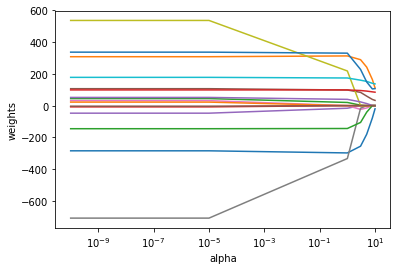

In [90]:
#set training and test dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state = 2)
X_train=scale(X_train)
alpha=[1e-10,1e-5,1,3,5,8,10]
lasso=Lasso()
coef=[]
for a in alpha:
    lasso.set_params(alpha=a)
    lasso.fit(X_train,Y_train)
    coef.append(lasso.coef_)

lasso_plot = plt.gca()
lasso_plot.plot(alpha, coef)
lasso_plot.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

Comment on which are the final three predictors that remain in the model.

In [95]:
lasso.set_params(alpha=180)
lasso.fit(scale(X_train), Y_train)
coef.append(lasso.coef_)
pd.Series(lasso.coef_, index=X.columns)

AtBat       0.000000
Hits        0.000000
HmRun       0.000000
Runs        0.000000
RBI         0.000000
Walks       0.000000
Years       0.000000
CAtBat      0.000000
CHits       0.000000
CHmRun     47.648667
CRuns      13.542515
CRBI       33.518086
CWalks      0.000000
PutOuts     0.000000
Assists     0.000000
Errors     -0.000000
dtype: float64

I set the parameter alpha=100 so that there are 3 columns remaining in the model, they are CHmRun,CRuns and CRBI
.

In [96]:
# Apply cross validation
lasso_cv=LassoCV(alphas = None,cv = 10, max_iter = 100000)
lasso_cv.fit(X_train,Y_train)
best_alpha=lasso_cv.alpha_
print('The optimal value of the regularization penality is',best_alpha)

The optimal value of the regularization penality is 2.70573428625


In [97]:
lasso.set_params(alpha=best_alpha)
lasso.fit(X_train,Y_train)
pd.Series(lasso.coef_,index=X.columns)

AtBat     -265.557534
Hits       295.615587
HmRun        3.872466
Runs         0.000000
RBI         -0.000000
Walks       85.752722
Years      -20.338981
CAtBat     -37.441264
CHits        0.000000
CHmRun     160.768734
CRuns      253.414057
CRBI         0.000000
CWalks    -114.515092
PutOuts     96.018644
Assists     25.644582
Errors       0.000000
dtype: float64

There are 11 predictors:AtBat, Hits,HmRun,Walks,Years,CAtBat,CHmRun,CRuns,CWalks,PutOuts and Assists that have non-zero coefficients, indicating that these 11 predictors remain in the model when applying the optimal regularization penalty.

## 1.2 Ridge

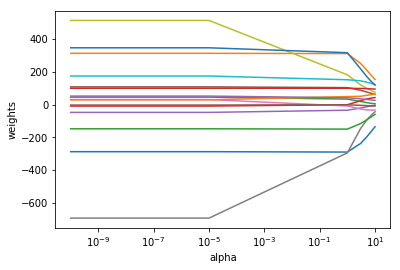

In [98]:
alpha=[1e-10,1e-5,1,3,5,8,10]
ridge=Ridge()
ridge_coef=[]
for a in alpha:
    ridge.set_params(alpha=a)
    ridge.fit(X_train,Y_train)
    ridge_coef.append(ridge.coef_)
#print(ridge_coef)


ridge_plot = plt.gca()
ridge_plot.plot(alpha, ridge_coef)
ridge_plot.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [99]:
# apply cross validation
ridge_cv=RidgeCV(alphas=alpha,scoring = 'neg_mean_squared_error')
ridge_cv.fit(X_train,Y_train)
best_alpha=ridge_cv.alpha_
print('The optimal value of regularization penalty is',best_alpha)

The optimal value of regularization penalty is 5.0


In [100]:
ridge.set_params(alpha=best_alpha)
ridge.fit(X_train,Y_train)
ridge.coef_

array([-197.10447865,  209.28728354,   11.67540974,   33.57409326,
        -13.93245528,   76.03644042,  -32.4740404 ,  -94.38552967,
         98.40750388,  135.76667264,  170.46796371,   56.09937956,
        -93.12209977,   96.4316618 ,   31.01052191,   -6.90484231])

There is no coefficients equaling to zero, because Ridge cannot be used to do model selesction. 

## 2. Short Answer 

#### Explain in your own words the bias-variance tradeoff.

Variance tells the spread-out of the dataset, and bias is the difference between our model and the correct model.
Increasing the bias will decrease the variance.Increasing the variance will decrease the bias. But we want a model with both low variace and low bias, so we need bias & variance trade off.
Bias and variance trade-off can be considered to check if the model fit well. If the models has small variance and high bias, there is an underfitting. If the models has high variance and small bias, there is an overfitting.


#### What role does regularization play in this tradeoff?Make reference to your findings in number (1) to describe models of high/low bias and variance.

Regularization helps us to adjust the weight of each independent variable and shrink the contribution of each variable. Therefore, we can get a midpoint between high variance and high bias by regularization.

From the Lasso and Rifge model:
After applying the optimal value of the penalty, Lasso shrinks the coeffieicents of some features to 0, and leaves 7 features in the mode, but Ridge contains all the predictors in the model. Hence, Ridge has higher variance but lower bias and Lasso has lower variance but higher bias.